# Assignment 1 

In [18]:
# Import Libaries

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#import seaborn as sns

## Stars Ratings

In [19]:
# Convert json to dataframes
df_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

#Convert csv to dataframes
#odf_business = pd.read_csv('yelp_academic_dataset_business.csv')

In [20]:
#odf_business.info()

In [21]:
# Drop N/A or missing values from the dataset
df_business = df_business.dropna()

In [22]:
#df_business.describe()

In [23]:
#df_business.info()

In [24]:
#df_business

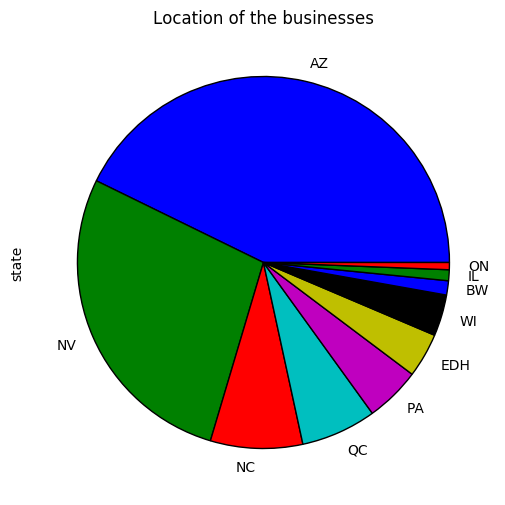

In [25]:
#Plot of top 10 states

df_business_json.state.value_counts()[:10].plot.pie(figsize=(6, 6))
plt.title('Location of the businesses')
plt.savefig('Top 10 states - Pie Chart')
plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5991: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


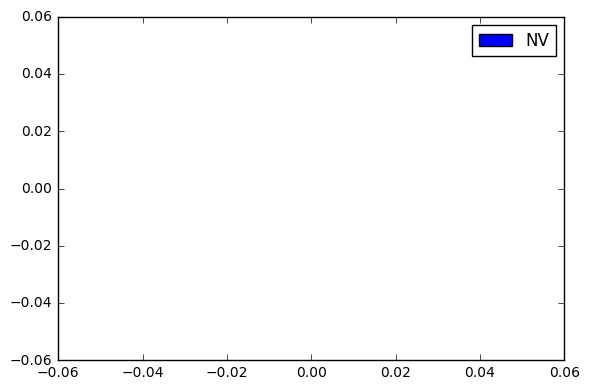

In [26]:

fig1, ax1 = plt.subplots()

bins = np.arange(1,6,0.5)

ax1.hist([df_business.stars[df_business.state == "b'NV'"],\
         df_business.stars[df_business.state == "b'NC'"],\
         df_business.stars[df_business.state == "b'WI'"]],\
        bins,
        align = 'left',
        label = ['NV', 'NC', 'WI'],
        normed = True
       )
#plt.title('Histograms of all star ratings for three states: NV, NC and BW')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()
plt.savefig('Histograms of all star ratings for three states: NV, NC and BW')

In [27]:
#Statistics Properties 

def stats(state):
    import scipy.stats as stats
    mean = np.mean(df_business[df_business.state == state].stars)
    std = np.std(df_business[df_business.state == state].stars)
    skewness = stats.skew(df_business.stars[df_business.state == state])
    kurtosis = stats.kurtosis(df_business.stars[df_business.state == state])
    first_moment = stats.moment(df_business.stars[df_business.state == state])
    second_moment = stats.moment(df_business.stars[df_business.state == state],moment=2)
    third_moment = stats.moment(df_business.stars[df_business.state == state],moment=3)
    four_moment = stats.moment(df_business.stars[df_business.state == state],moment=4)
    return (print('Mean: %s' % mean), \
            print('Standard Deviation: %s' % std), \
            print('Skewness: %s' % skewness),\
            print('Kurtosis: %s' % kurtosis),\
           print('First Moment: %s' % first_moment),\
            print('Second Moment: %s' % second_moment),\
           print('Third Moment: %s' % third_moment),\
           print('Four Moment: %s' % four_moment))

print('-----Statistics Properties for state NV------')
stats("b'NV'")
print('-----Statistics Properties for state NC------')
stats("b'NC'")
print('-----Statistics Properties for state BW------')
stats("b'BW'")

-----Statistics Properties for state NV------
Mean: nan
Standard Deviation: nan
Skewness: nan
Kurtosis: nan
First Moment: nan
Second Moment: nan
Third Moment: nan
Four Moment: nan
-----Statistics Properties for state NC------
Mean: nan
Standard Deviation: nan
Skewness: nan
Kurtosis: nan
First Moment: nan
Second Moment: nan
Third Moment: nan
Four Moment: nan
-----Statistics Properties for state BW------
Mean: nan
Standard Deviation: nan
Skewness: nan
Kurtosis: nan
First Moment: nan
Second Moment: nan
Third Moment: nan
Four Moment: nan


(None, None, None, None, None, None, None, None)

In [28]:
import matplotlib.mlab as mlab

fig, ax = plt.subplots()

bins = np.arange(1,6,0.5)

ax.hist(df_business.stars[df_business.state == "b'NV'"],
        bins,
        align = 'left',
        label = ['PA'],
        normed = True
       )

x = np.linspace(1,5,100)

# Fit a Normal distribution

(mu, sigma) = stats.norm.fit([df_business.stars[df_business.state == "b'NV'"]])
pdf_fitted = stats.norm.pdf(x,loc=mu,scale=sigma)
plt.plot(x,pdf_fitted,'r-',label='Normal Distribution')

# Fit a Gamma Distribution

fit_alpha, fit_loc, fit_beta=stats.gamma.fit([df_business.stars[df_business.state == "b'NV'"]])
pdf_fitted = stats.gamma.pdf(x,fit_alpha,fit_loc,fit_beta)
plt.plot(x,pdf_fitted,'y-',label='Gamma Distribution')

# Fit a Rayleigh Distribution

param = stats.rayleigh.fit([df_business.stars[df_business.state == "b'NV'"]])
pdf_fitted = stats.rayleigh.pdf(x,loc=param[0],scale=param[1])
plt.plot(x,pdf_fitted,'b-',label='Rayleigh Distribution')

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5991: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


AttributeError: 'function' object has no attribute 'norm'

## Type of business

In [ ]:
# List of top 20 business categories 
data = []
def flatten(l, a):
    for i in l:
        if isinstance(i, list):
            flatten(i, a)
        else:
            a.append(i)
    return a
flatten_business_categories_data = flatten(df_business_json.categories,data)
#flatten_business_categories_data = flatten(df_business.categories,data)      ##Cannot use csv version of the data##
s = pd.Series(flatten_business_categories_data)
vc = s.value_counts()
vc[:20]

In [ ]:
df_business_type = df_business[['Beauty & Spas' in c for c in df_business.categories]]

In [ ]:
df_business_type.info()

In [ ]:
fig, ax = plt.subplots()

bins = np.arange(1,6,0.5)

ax.hist([df_business_type[df_business_type.state == "b'NV'"].stars,\
         df_business_type[df_business_type.state == "b'NC'"].stars,\
         df_business_type[df_business_type.state == "b'BW'"].stars],\
        bins,
        align = 'left',
        label = ['NV', 'NC', 'BW'],
        normed = True
       )

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
#Statistics Properties 

def stats_properties(data,state):
    import scipy.stats as stats
    counts = len(data[data.state == state].stars)
    mean = np.mean(data[data.state == state].stars)
    std = np.std(data[data.state == state].stars)
    skewness = stats.skew(data.stars[data.state == state])
    kurtosis = stats.kurtosis(data.stars[data.state == state])
    first_moment = stats.moment(data.stars[data.state == state])
    second_moment = stats.moment(data.stars[data.state == state],moment=2)
    third_moment = stats.moment(data.stars[data.state == state],moment=3)
    four_moment = stats.moment(data.stars[data.state == state],moment=4)
    return (print('Counts: %s' % counts),\
            print('Mean: %s' % mean), \
            print('Standard Deviation: %s' % std), \
            print('Skewness: %s' % skewness),\
            print('Kurtosis: %s' % kurtosis),\
           print('First Moment: %s' % first_moment),\
            print('Second Moment: %s' % second_moment),\
           print('Third Moment: %s' % third_moment),\
           print('Four Moment: %s' % four_moment))

print('-----Statistics Properties for state NV------')
stats_properties(df_business_type,"b'NV'")
print('-----Statistics Properties for state NC------')
stats_properties(df_business_type,"b'NC'")
print('-----Statistics Properties for state BW------')
stats_properties(df_business_type,"b'BW'")

## Number of reviews

In [ ]:
odf_review = pd.read_json("yelp_academic_dataset_review.jsonw")

In [ ]:
#odf_review.info()

In [ ]:
df_review = odf_review.dropna()

In [ ]:
new_df_review = df_review.drop(['review_id','type','cool','useful','funny','text'],axis = 1)

In [ ]:
omerged_df = pd.merge(df_business,new_df_review, on = 'business_id')

In [ ]:
merged_df = omerged_df.dropna()

In [ ]:
merged_df.describe()

In [ ]:
merged_df

In [ ]:
fig, ax = plt.subplots()
#'NV','NC','BW'

ax.hist([merged_df[merged_df.state == "b'NV'"].user_id.value_counts(),\
         merged_df[merged_df.state == "b'NV'"].business_id.value_counts()],
        bins = range(30),
        align = 'left',
        label = ['User','Business'],
        normed = True
       )
plt.legend(loc = 'upper right')
plt.title('Number of reviews')
plt.show()

In [ ]:
def userid_stats_properties(data,state):
    import scipy.stats as stats
    counts = len(data[data.state == state].user_id.value_counts())
    mean = np.mean(data[data.state == state].user_id.value_counts())
    std = np.std(data[data.state == state].user_id.value_counts())
    skewness = stats.skew(data[data.state == state].user_id.value_counts())
    kurtosis = stats.kurtosis(data[data.state == state].user_id.value_counts())
    first_moment = stats.moment(data[data.state == state].user_id.value_counts())
    second_moment = stats.moment(data[data.state == state].user_id.value_counts(),moment=2)
    third_moment = stats.moment(data[data.state == state].user_id.value_counts(),moment=3)
    four_moment = stats.moment(data[data.state == state].user_id.value_counts(),moment=4)
    return (print('Counts: %s' % counts),\
            print('Mean: %s' % mean), \
            print('Standard Deviation: %s' % std), \
            print('Skewness: %s' % skewness),\
            print('Kurtosis: %s' % kurtosis),\
           print('First Moment: %s' % first_moment),\
            print('Second Moment: %s' % second_moment),\
           print('Third Moment: %s' % third_moment),\
           print('Four Moment: %s' % four_moment))

def businessid_stats_properties(data,state):
    import scipy.stats as stats
    counts = len(data[data.state == state].business_id.value_counts())
    mean = np.mean(data[data.state == state].business_id.value_counts())
    std = np.std(data[data.state == state].business_id.value_counts())
    skewness = stats.skew(data[data.state == state].business_id.value_counts())
    kurtosis = stats.kurtosis(data[data.state == state].business_id.value_counts())
    first_moment = stats.moment(data[data.state == state].business_id.value_counts())
    second_moment = stats.moment(data[data.state == state].business_id.value_counts(),moment=2)
    third_moment = stats.moment(data[data.state == state].business_id.value_counts(),moment=3)
    four_moment = stats.moment(data[data.state == state].business_id.value_counts(),moment=4)
    return (print('Counts: %s' % counts),\
            print('Mean: %s' % mean), \
            print('Standard Deviation: %s' % std), \
            print('Skewness: %s' % skewness),\
            print('Kurtosis: %s' % kurtosis),\
           print('First Moment: %s' % first_moment),\
            print('Second Moment: %s' % second_moment),\
           print('Third Moment: %s' % third_moment),\
           print('Four Moment: %s' % four_moment))

print('-----Statistics Properties of the numbers of reviews given by each individual users------')
userid_stats_properties(merged_df,"b'NV'")
print('-----Statistics Properties of the numbers of reviews given by each individual business------')
businessid_stats_properties(merged_df,"b'NV'")

# To do:

In [ ]:
#Code to fit a power law distribution for the number of reviews

#Code to draw the tail distribution

In [ ]:
#Estimate the parameters of power law distribution given our data on the number of reviews

